### Eksperymentalne wyznaczenie zbierzności macierzy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
P = [
    [0.64, 0.32, 0.04],
    [0.4, 0.5, 0.1],
    [0.25, 0.5, 0.25]
]

In [4]:
start_positions = [0, 1, 2]
simulations = 10**4

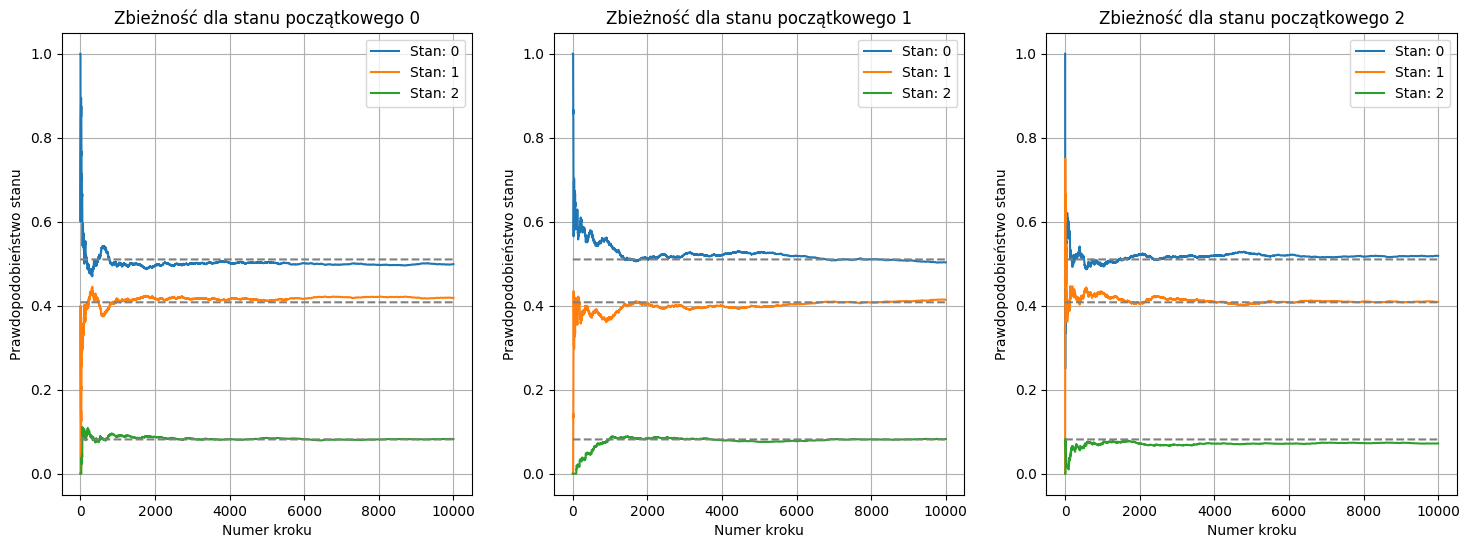

In [5]:
matrix = np.array(P)
expected = np.linalg.matrix_power(matrix, simulations)[1]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, start_position in enumerate(start_positions):
  current_position = start_position
  y_values = [[] for _ in start_positions]
  visited = np.zeros(len(start_positions))

  for j in range(1, simulations):
    current_position = np.random.choice(len(matrix[current_position]), p=matrix[current_position])
    visited[current_position] += 1
    for k, val in enumerate(y_values):
      val.append(visited[k] / j)

  for k, val in enumerate(y_values):
    axes[i].plot(range(simulations - 1), val, label=f'Stan: {k}')
    axes[i].plot(range(simulations - 1), [expected[k]] * (simulations - 1), linestyle='--', color='grey')

  axes[i].set_title(f'Zbieżność dla stanu początkowego {i}')
  axes[i].set_ylabel('Prawdopodobieństwo stanu')
  axes[i].set_xlabel('Numer kroku')
  axes[i].grid(True)
  axes[i].legend()
